### import the libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

### Run this cell for plotting

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''

    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

### implement this function to classify leaves

In [182]:
def classify_leaf(image):
    '''
    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        int: The class of the image. 1 == apple, 0 == linden
    '''

    leaf_type = 0

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    struct = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, struct)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)

    area = cv2.contourArea(largest_contour)
    perimeter = cv2.arcLength(largest_contour, True)
    compactness = (area * 4 * np.pi) / (perimeter * perimeter)
    
    if compactness > 0.48:
        leaf_type = 1

    return leaf_type

### Test your implementation (don't change this cell)

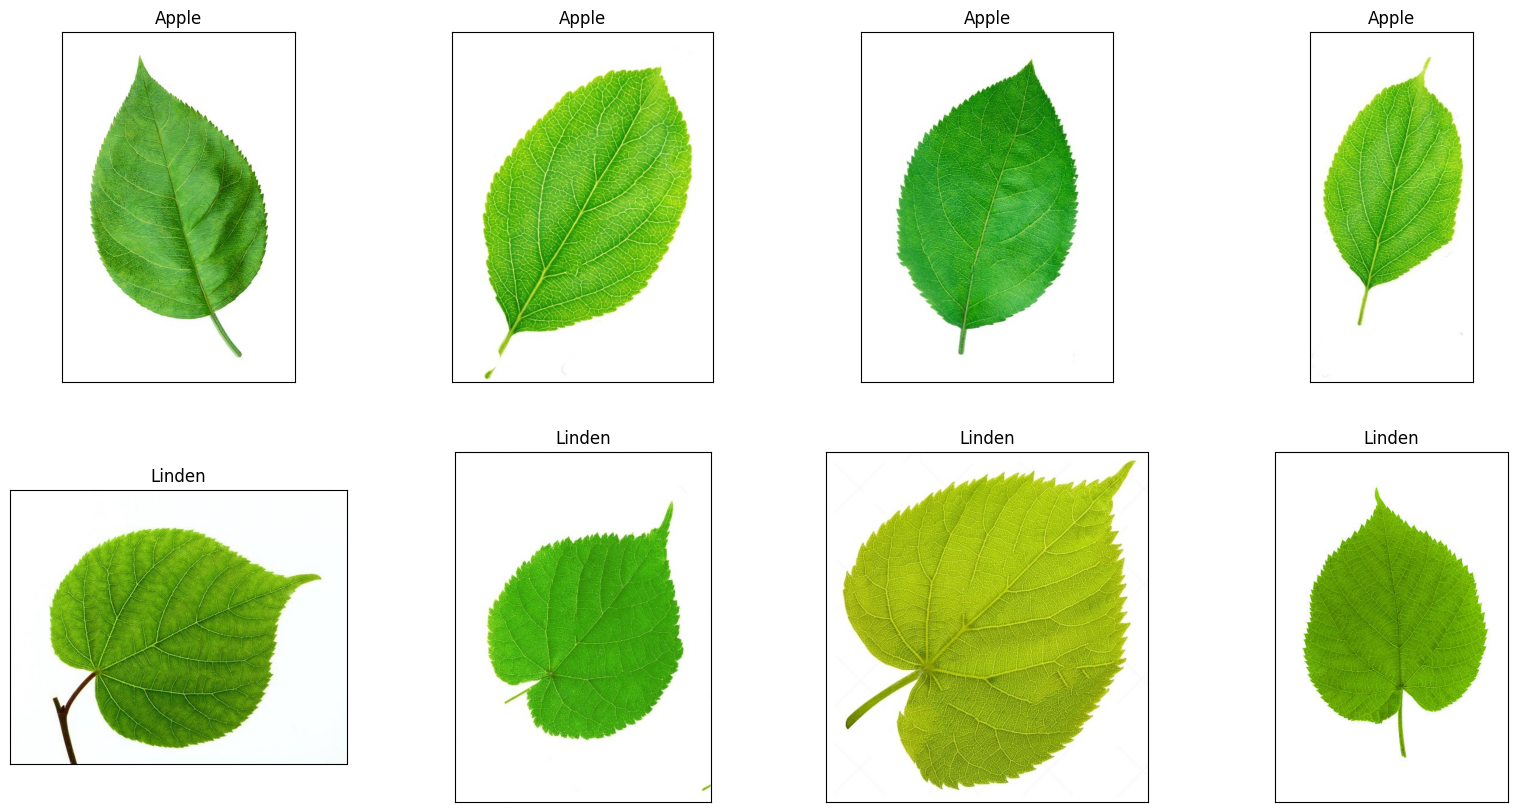

Accuracy is 100.0%


In [183]:
image_list = []
acc = 0
for i in range(1,5):
    image = cv2.imread(os.path.join('images', 'apple', '{}.jpg'.format(i)))
    leaf_type = classify_leaf(image)
    acc += int(leaf_type==1)
    image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB),'Apple' if leaf_type else 'Linden' , 'img'])
for i in range(1,5):
    image = cv2.imread(os.path.join('images', 'linden', '{}.jpg'.format(i)))
    leaf_type = classify_leaf(image)
    acc += int(leaf_type==0)
    image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB),'Apple' if leaf_type else 'Linden' , 'img'])
plotter(image_list, 2, 4, True, 20, 10, 'leaf-classifier')
print("Accuracy is {}%".format(acc/0.08))